<a href="https://colab.research.google.com/github/omarashour04/Healthcare_Predictive_Analytics/blob/main/DEPI_Final_Project_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning


In [39]:
from IPython import get_ipython
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/healthcare_dataset.csv')
# Display the first few rows of the dataset
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [40]:
#Initial assessment
print(f"Dataset shape: {df.shape}")
print("\nData types:\n", df.dtypes)
print("\nSample data:\n", df.head())

Dataset shape: (55500, 15)

Data types:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object

Sample data:
             Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   


In [41]:
# Check for missing values
print("Missing values :\n", df.isnull().sum())

Missing values :
 Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [42]:
# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 534


In [43]:
# Remove duplicates keeping the first occurrence
df.drop_duplicates(inplace=True)

##Normalization

In [44]:
#Select numerical columns for normalization
numerical_cols = ['Billing Amount']

# Apply Min-Max normalization
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + '_normalized'] = (df[col] - min_val) / (max_val - min_val)



print(df.head())


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

##Data selection

In [45]:
# Select patients over 60 years old
elderly_patients = df[df['Age'] > 60]

# Select admissions with billing amount over 90th percentile
high_billing = df[df['Billing Amount'] > df['Billing Amount'].quantile(0.9)]

# Select female patients with a specific condition
female_diabetes = df[(df['Gender'] == 'Female') & (df['Medical Condition'] == 'Diabetes')]


In [46]:
# Display selected data samples
display(elderly_patients.head())
display(high_billing.head())
display(female_diabetes.head())

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Billing Amount_normalized
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,0.650904
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,0.547053
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal,0.951709
10,mIchElLe daniELs,72,Male,O+,Cancer,2020-04-19,John Duncan,Schaefer-Porter,Medicare,12576.795609,394,Urgent,2020-04-22,Paracetamol,Normal,0.266287
12,connOR HANsEn,75,Female,A+,Diabetes,2019-12-12,Kenneth Fletcher,"Powers Miller, and Flores",Cigna,43282.283358,134,Emergency,2019-12-28,Penicillin,Abnormal,0.826885


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Billing Amount_normalized
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal,0.915667
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive,0.873225
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal,0.951709
30,ThOMAS MartInEZ,34,Male,B-,Asthma,2019-08-18,Jacob Huynh,Hart Ltd,Cigna,47909.128810,371,Urgent,2019-09-01,Ibuprofen,Inconclusive,0.911358
35,DAvID AndErSON,25,Female,AB+,Asthma,2021-01-07,Emma Allison,Sons and Cox,Medicare,45453.418546,228,Elective,2021-01-26,Lipitor,Abnormal,0.866524


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Billing Amount_normalized
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,0.728798
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive,0.394162
12,connOR HANsEn,75,Female,A+,Diabetes,2019-12-12,Kenneth Fletcher,"Powers Miller, and Flores",Cigna,43282.283358,134,Emergency,2019-12-28,Penicillin,Abnormal,0.826885
27,mr. KenNEth MoORE,34,Female,A+,Diabetes,2022-06-21,James Ellis,Serrano-Dixon,UnitedHealthcare,18834.801341,157,Emergency,2022-06-30,Lipitor,Abnormal,0.380541
34,NicOlE RodriGUEz,30,Female,AB+,Diabetes,2020-01-17,Lynn Young,Poole Inc,Blue Cross,8408.949354,285,Emergency,2020-02-10,Lipitor,Normal,0.190194


## Data Analysis

In [47]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                Age  Billing Amount   Room Number  Billing Amount_normalized
count  54966.000000    54966.000000  54966.000000               54966.000000
mean      51.535185    25544.306284    301.124404                   0.503038
std       19.605661    14208.409711    115.223143                   0.259406
min       13.000000    -2008.492140    101.000000                   0.000000
25%       35.000000    13243.718641    202.000000                   0.278463
50%       52.000000    25542.749145    302.000000                   0.503010
75%       68.000000    37819.858159    401.000000                   0.727156
max       89.000000    52764.276736    500.000000                   1.000000


In [48]:
# Count of each medical condition
print("\nMedical Condition Distribution:")
print(df['Medical Condition'].value_counts())


Medical Condition Distribution:
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64


In [49]:
# Average billing amount per hospital
avg_billing_hospital = df.groupby('Hospital')['Billing Amount'].mean().sort_values(ascending=False)
print("\nAverage Billing Amount by Hospital:")
print(avg_billing_hospital)


Average Billing Amount by Hospital:
Hospital
Hernandez-Morton                 52373.032374
Walker-Garcia                    52170.036854
Ruiz-Anthony                     52154.237722
George-Gonzalez                  52102.240889
Rocha-Carter                     52092.669896
                                     ...     
Hunter-Hughes                    -1018.245371
Lawrence and Cooper Saunders,    -1129.997176
Clements-Bowman                  -1277.645337
Medina and Elliott Stewart,      -1316.618581
Juarez-Clark                     -2008.492140
Name: Billing Amount, Length: 39876, dtype: float64


In [50]:
# Convert date columns to datetime, handling potential errors
date_cols = ['Date of Admission', 'Discharge Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Coerce errors to NaT

# Calculate length of stay, excluding rows with invalid dates
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Remove rows with NaT (Not a Time) values in 'Length of Stay' if needed
df.dropna(subset=['Length of Stay'], inplace=True)

In [51]:
# Average length of stay in days
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
avg_stay = df['Length of Stay'].mean()
print(f"\nAverage Length of Stay: {avg_stay:.2f} days")


Average Length of Stay: 15.50 days


##Data visulaization

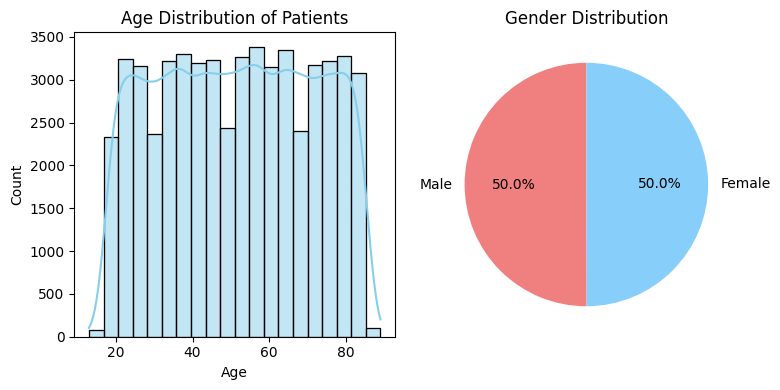

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Age distribution
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=ax1)
ax1.set_title('Age Distribution of Patients')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

# Gender distribution
gender_counts = df['Gender'].value_counts()
ax2.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue'], startangle=90)
ax2.set_title('Gender Distribution')

plt.tight_layout()
plt.show()


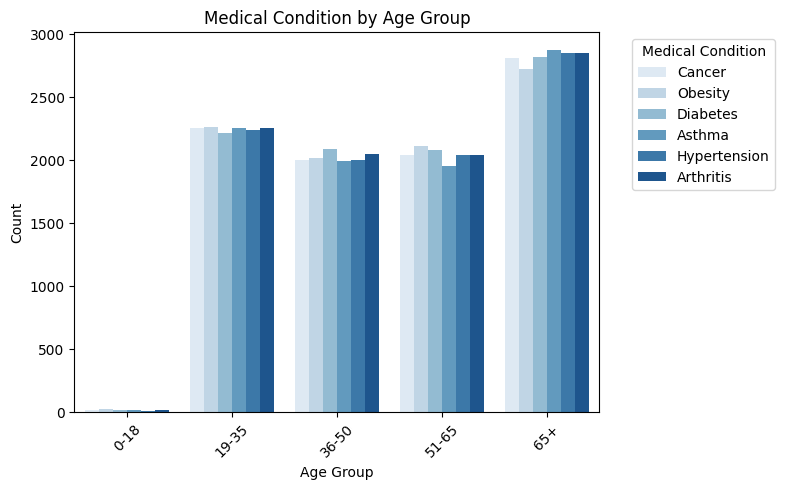

<ipython-input-53-c73749db1143>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admission Month', data=df, order=month_order, palette='Blues')


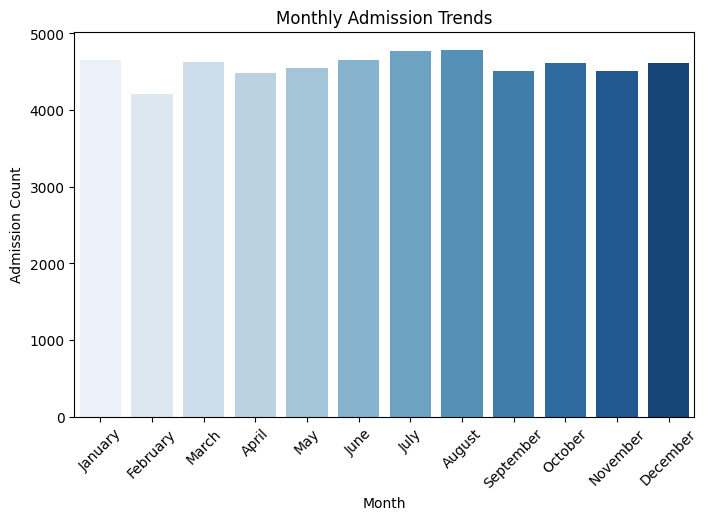

In [53]:
# Age groups
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Medical condition by age group
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Medical Condition', data=df, palette='Blues')
plt.title('Medical Condition by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Monthly admission trends
df['Admission Month'] = df['Date of Admission'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(8, 5))
sns.countplot(x='Admission Month', data=df, order=month_order, palette='Blues')
plt.title('Monthly Admission Trends')
plt.xlabel('Month')
plt.ylabel('Admission Count')
plt.xticks(rotation=45)
plt.show()


## Data training

#XGBClassifier training model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [55]:
# Define target and features
df['Has_Diabetes'] = (df['Medical Condition'] == 'Diabetes').astype(int)
features = ['Age', 'Gender', 'Blood Type', 'Billing Amount', 'Admission Type',
            'Length of Stay', 'Medication', 'Test Results']
df_model = df[features + ['Has_Diabetes']].dropna()

# Encode categorical features
for col in ['Gender', 'Blood Type', 'Admission Type', 'Medication', 'Test Results']:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Feature matrix and target
X = df_model.drop('Has_Diabetes', axis=1)
y = df_model['Has_Diabetes']

# Standardize numerical features
X = StandardScaler().fit_transform(X)

# Handle class imbalance with SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

In [56]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:41:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [57]:
# Predictions and evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")

Confusion Matrix:
 [[9182   36]
 [2255 6827]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      9218
           1       0.99      0.75      0.86      9082

    accuracy                           0.87     18300
   macro avg       0.90      0.87      0.87     18300
weighted avg       0.90      0.87      0.87     18300

Accuracy: 0.87
ROC AUC: 0.87


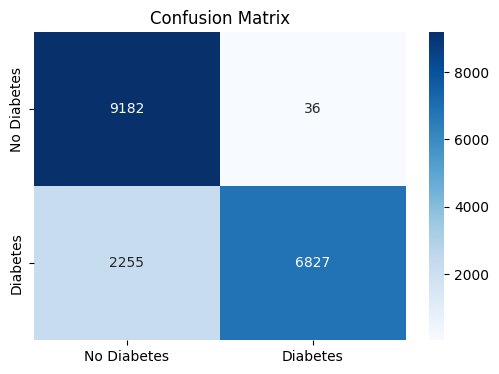

In [58]:
#Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.show()

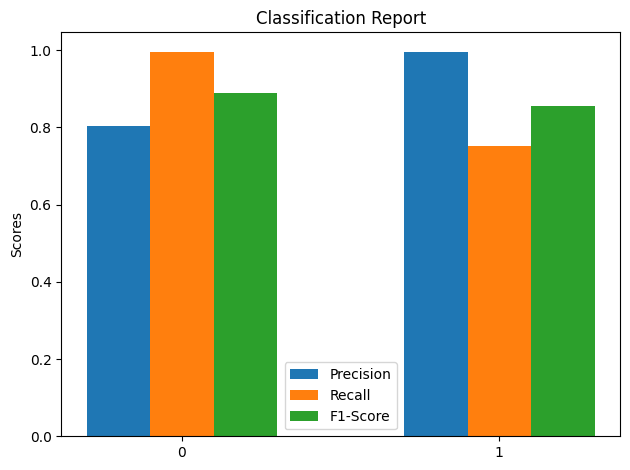

In [59]:
#Plot classification report
#Exclude accuracy, macro avg, and weighted avg
report_dict = classification_report(y_test, y_pred, output_dict=True)
classes = list(report_dict.keys())[:-3]
precision = [report_dict[c]['precision'] for c in classes]
recall = [report_dict[c]['recall'] for c in classes]
f1_score = [report_dict[c]['f1-score'] for c in classes]

x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

fig.tight_layout()
plt.show()

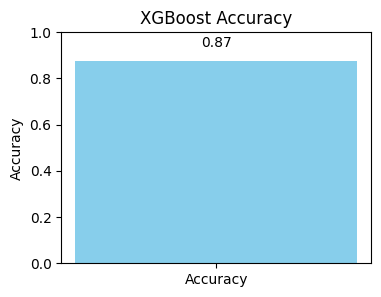

In [60]:
#Plot accuracy
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(4, 3))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('XGBoost Accuracy')
plt.text(0, accuracy + 0.05, f'{accuracy:.2f}', ha='center', va='bottom')
plt.show()

#Random Forest Classifier

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define target: Predict if patient has Diabetes (binary classification: 1 = Yes, 0 = No)
df['Has_Diabetes'] = (df['Medical Condition'] == 'Diabetes').astype(int)

# Feature selection (drop non-numeric or ID-like columns)
features = ['Age', 'Gender', 'Blood Type', 'Billing Amount', 'Admission Type']
df_model = df[features + ['Has_Diabetes']].dropna()

# Encode categorical features
label_encoders = {}
for col in ['Gender', 'Blood Type', 'Admission Type']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le  # Save encoders if needed later

# Feature matrix and target variable
X = df_model.drop('Has_Diabetes', axis=1)
y = df_model['Has_Diabetes']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluation metrics
print("\nModel Evaluation Results:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



Model Evaluation Results:
[[8648  460]
 [1750  136]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      9108
           1       0.23      0.07      0.11      1886

    accuracy                           0.80     10994
   macro avg       0.53      0.51      0.50     10994
weighted avg       0.73      0.80      0.75     10994

Accuracy: 0.80


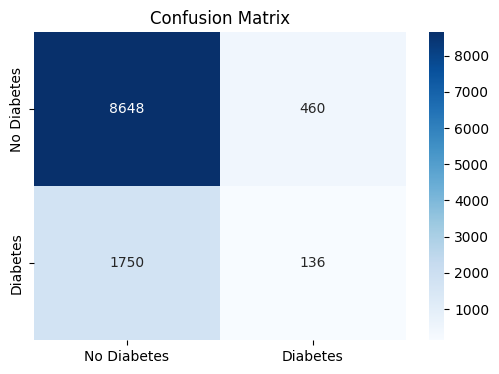

In [62]:
#Plot confusion matrix for Random forest
plt.figure(figsize=(6, 4))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.show()

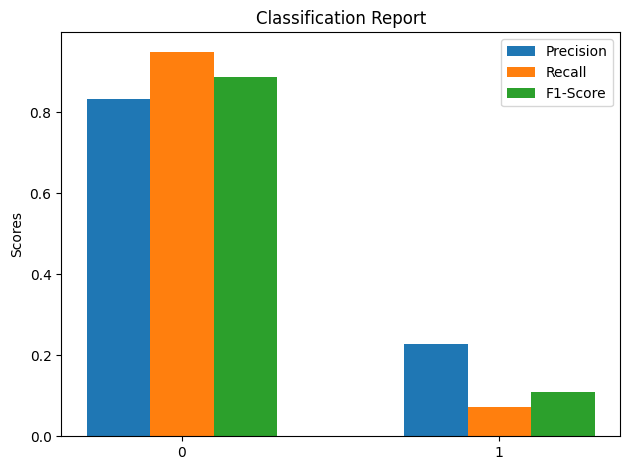

In [63]:
#Plot classification report for random forest
#Exclude accuracy, macro avg, and weighted avg
report_dict = classification_report(y_test, y_pred, output_dict=True)
classes = list(report_dict.keys())[:-3]
precision = [report_dict[c]['precision'] for c in classes]
recall = [report_dict[c]['recall'] for c in classes]
f1_score = [report_dict[c]['f1-score'] for c in classes]

x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

fig.tight_layout()
plt.show()

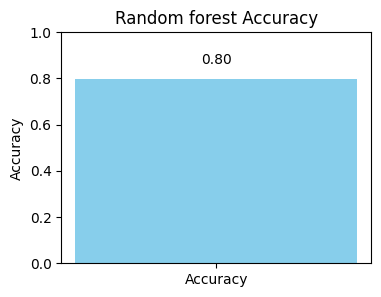

In [64]:
#Plot accuracy for random forest
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(4, 3))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Random forest Accuracy')
plt.text(0, accuracy + 0.05, f'{accuracy:.2f}', ha='center', va='bottom')
plt.show()

In [65]:
!pip install catboost

#CatBoostClassifier

In [66]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# Prepare target
df['Has_Diabetes'] = (df['Medical Condition'] == 'Diabetes').astype(int)

# Select features
features = ['Age', 'Gender', 'Blood Type', 'Billing Amount', 'Admission Type',
            'Length of Stay', 'Medication', 'Test Results']
cat_features = ['Gender', 'Blood Type', 'Admission Type', 'Medication', 'Test Results']

df_model = df[features + ['Has_Diabetes']].dropna()
X = df_model[features]
y = df_model['Has_Diabetes']

# Encode categorical features numerically for SMOTE (temporarily)
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply SMOTE to encoded data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Instead of mapping back, use the resampled data directly
# X_unencoded = X.iloc[:len(X_resampled)].copy().reset_index(drop=True) # This line is removed

# Train-test split using the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train CatBoost, but ensure to pass 'cat_features' during prediction as well
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)  # cat_features is not needed during fitting with encoded data

# Evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")

Confusion Matrix:
 [[9161   57]
 [2637 6445]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      9218
           1       0.99      0.71      0.83      9082

    accuracy                           0.85     18300
   macro avg       0.88      0.85      0.85     18300
weighted avg       0.88      0.85      0.85     18300

Accuracy: 0.85
ROC AUC: 0.85


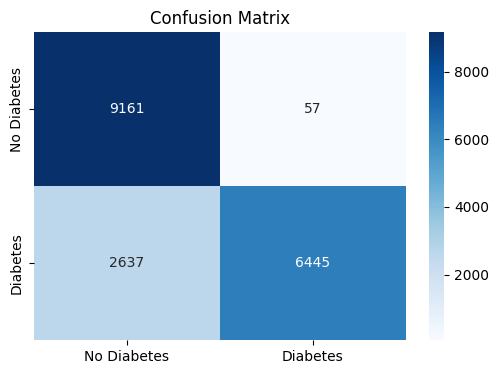

In [67]:
#Plot confusion matrix for CatBoost Classifier
plt.figure(figsize=(6, 4))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.show()

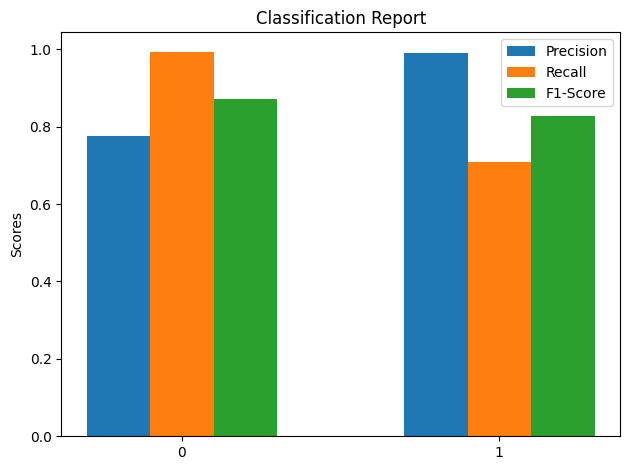

In [68]:
#Plot classification report for CatBoost classifier
#Exclude accuracy, macro avg, and weighted avg
report_dict = classification_report(y_test, y_pred, output_dict=True)
classes = list(report_dict.keys())[:-3]
precision = [report_dict[c]['precision'] for c in classes]
recall = [report_dict[c]['recall'] for c in classes]
f1_score = [report_dict[c]['f1-score'] for c in classes]

x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

ax.set_ylabel('Scores')
ax.set_title('Classification Report')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

fig.tight_layout()
plt.show()

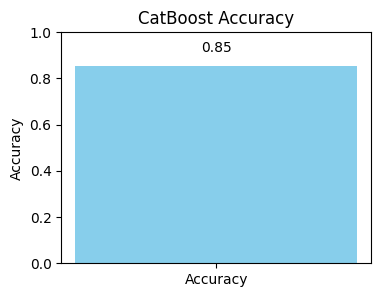

In [69]:
#Plot accuracy for CatBoost
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(4, 3))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('CatBoost Accuracy')
plt.text(0, accuracy + 0.05, f'{accuracy:.2f}', ha='center', va='bottom')
plt.show()

# **Model Optimization**

In [72]:
# prompt: i want to make model optimization on the xgboost classifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier # Import XGBClassifier

# Define the parameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV with XGBClassifier
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), # Use XGBClassifier here
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Accuracy of best model: {accuracy_score(y_test, y_pred):.2f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:15:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Best accuracy found:  0.85698087431694
Accuracy of best model: 0.86


# **Note**: Flase negatives ar increased after optimization . below we can find resolving this issue


In [75]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

# Try different thresholds
for threshold in [0.3, 0.4, 0.5]:
    print(f"\nThreshold: {threshold}")
    y_pred_thresh = (y_proba >= threshold).astype(int)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_thresh))
    print("Classification Report:")
    print(classification_report(y_test, y_pred_thresh))



Threshold: 0.3
Confusion Matrix:
[[7308 1910]
 [1334 7748]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      9218
           1       0.80      0.85      0.83      9082

    accuracy                           0.82     18300
   macro avg       0.82      0.82      0.82     18300
weighted avg       0.82      0.82      0.82     18300


Threshold: 0.4
Confusion Matrix:
[[8482  736]
 [1833 7249]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      9218
           1       0.91      0.80      0.85      9082

    accuracy                           0.86     18300
   macro avg       0.87      0.86      0.86     18300
weighted avg       0.86      0.86      0.86     18300


Threshold: 0.5
Confusion Matrix:
[[8978  240]
 [2232 6850]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      

In [76]:
recall_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,  # reuse the same param_grid
    scoring='recall',
    cv=3,
    verbose=1,
    n_jobs=-1
)
recall_grid.fit(X_train, y_train)

print("Best Parameters (Recall):", recall_grid.best_params_)
print("Best Recall Score:", recall_grid.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:44:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters (Recall): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Recall Score: 0.7441909897829996


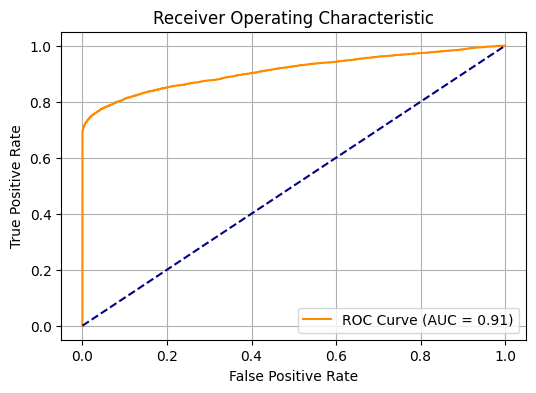

In [77]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()
